<a href="https://colab.research.google.com/github/msuman-07/ML-Projects/blob/main/Web_Ad_Optimization_using_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ad_clicks_dataset_10000.csv to ad_clicks_dataset_10000.csv


# Importing the dataset

In [ ]:
dataset = pd.read_csv('ad_clicks_dataset_10000.csv')
print(dataset.shape)
print(dataset.head (5))

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     0     1     0     0     0     1     0     0     0      1
1     0     0     0     0     1     0     1     1     1      0
2     1     0     1     1     1     1     1     1     1      1
3     0     0     1     1     1     0     1     0     0      0
4     0     0     1     1     1     1     1     0     1      1


In [ ]:
import math

# Simulation parameters
observations = 10000
no_of_ads = 10

# Import dataset (simulate dummy binary dataset for testing purposes)
# Each row is one user, each column is whether they clicked on ad_i (0 or 1)
dataset = pd.DataFrame(np.random.randint(0, 2, size=(observations, no_of_ads)))

# Data structures
ads_selected = []
numbers_of_selections_of_each_ad = [0] * no_of_ads
sums_of_rewards_of_each_ad = [0] * no_of_ads
total_reward = 0

# UCB algorithm
for n in range(0, observations):
    ad = 0
    max_upper_bound = 0
    for i in range(0, no_of_ads):
        if numbers_of_selections_of_each_ad[i] > 0:
            average_reward = sums_of_rewards_of_each_ad[i] / numbers_of_selections_of_each_ad[i]
            delta_i = math.sqrt((3/2) * math.log(n + 1) / numbers_of_selections_of_each_ad[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = float('inf')  # Assign high value for first-time ads

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections_of_each_ad[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards_of_each_ad[ad] += reward
    total_reward += reward

# Output
print("Rewards by Ads =", sums_of_rewards_of_each_ad)
print("Total Rewards by UCB =", total_reward)
print("Ads selected at each round:",ads_selected)

Rewards by Ads = [np.int64(490), np.int64(555), np.int64(750), np.int64(510), np.int64(478), np.int64(511), np.int64(702), np.int64(420), np.int64(302), np.int64(221)]
Total Rewards by UCB = 4939
Ads selected at each round: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 9, 2, 9, 9, 0, 1, 6, 7, 8, 9, 1, 3, 4, 5, 6, 9, 1, 2, 4, 2, 2, 9, 3, 5, 6, 1, 3, 4, 5, 6, 0, 7, 8, 8, 1, 5, 1, 2, 5, 9, 1, 2, 5, 3, 4, 4, 6, 2, 5, 9, 8, 5, 0, 7, 7, 5, 2, 9, 1, 4, 4, 4, 4, 3, 6, 6, 7, 7, 7, 7, 8, 8, 8, 4, 4, 4, 5, 5, 2, 2, 9, 1, 1, 1, 7, 0, 0, 0, 0, 0, 6, 6, 8, 3, 3, 3, 3, 4, 4, 5, 5, 1, 1, 1, 2, 2, 3, 3, 9, 6, 6, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 1, 5, 2, 2, 3, 6, 6, 8, 8, 9, 9, 0, 4, 7, 1, 2, 2, 5, 3, 3, 3, 6, 6, 8, 9, 0, 0, 0, 2, 4, 4, 1, 1, 1, 1, 1, 3, 3, 5, 0, 0, 1, 7, 6, 6, 6, 6, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 9, 2, 2, 3, 3, 0, 0, 0, 0, 1, 1, 8, 8, 8, 5, 0, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 7, 2, 3, 8, 8, 8, 1, 1, 9, 4, 4, 4, 0, 8, 8, 5, 6, 4, 1, 2, 2, 2, 2, 3, 8, 2, 0, 7, 4, 4, 6

# Visualizing Result

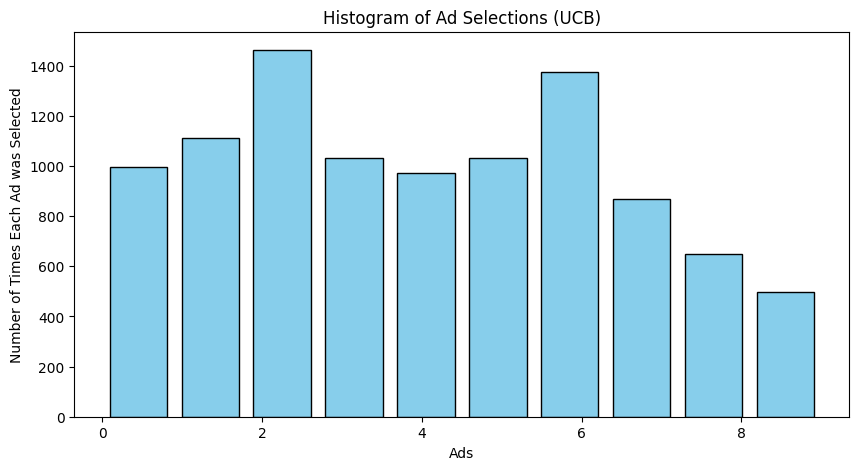

In [7]:
plt.figure(figsize=(10,5))
plt.hist(ads_selected, bins=no_of_ads, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Histogram of Ad Selections (UCB)")
plt.xlabel("Ads")
plt.ylabel("Number of Times Each Ad was Selected")
plt.show()